Instructions:
Running a coding exercise for the first time could take a bit of time for everything to load. Be patient, it could take a few minutes.

When you see ____ in a coding exercise, replace it with what you assume to be the correct code. Run it and see if you obtain the desired output. Submit your code to validate if you were correct.

Make sure you remove the hash (#) symbol in the coding portions of this question. We have commented them so that the line won’t execute and you can test your code after each step.

We’ve seen our basketball dataset before and predicted using SVC with it before but this time we are going to have a look at how well our model does by building a confusion matrix.

Tasks:

Import the plotting confusion matrix library.

Build a pipeline named pipe_bb that preprocesses with preprocessor and builds an SVC() model with default hyperparameters.

Fit the pipeline on X_train and y_train.

Next, build a confusion matrix using plot_confusion_matrix and calling pipe_bb on the test set. Pick any colour you like with cmap. 


Import the plotting confusion matrix library.

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

Loading in the data

In [2]:
bball = pd.read_csv('bball_cm.csv')

train_df, test_df = train_test_split(bball, test_size=0.2, random_state=1)

X_train = train_df
y_train = train_df['position']
X_test = test_df
y_test = test_df['position']

drop_features = ['full_name', 'jersey', 'b_day', 'college', 'position']

numeric_features = [
    "rating",
    "height",
    "weight",
    "salary",
    "draft_year",
    "draft_round",
    "draft_peak"]

categorical_features = [
    "team",
    "country"]

numeric_transformer = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

categorical_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"),
)

preprocessor = make_column_transformer(
    ("drop", drop_features),
    (numeric_transformer, numeric_features), 
    (categorical_transformer, categorical_features)
)

Build a pipeline containing the column transformer and an SVC model

Build a pipeline named pipe_bb that preprocesses with preprocessor and builds an SVC() model with default hyperparameters.

In [3]:
pipe_bb = make_pipeline(preprocessor, SVC())

Fit your pipeline on the training data

Fit the pipeline on X_train and y_train.

In [4]:
pipe_bb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('drop', 'drop',
                                                  ['full_name', 'jersey',
                                                   'b_day', 'college',
                                                   'position']),
                                                 ('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['rating', 'height', 'weight',
                                                   'salary', 'draft_year',
                                                   'draft_round',
                                                   'draft_peak']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['team', 'country'])])),
                ('svc', SVC())])

Plot your confusion matrix

Build a confusion matrix using plot_confusion_matrix and calling pipe_bb on the test set. Pick the color "PuRd" with cmap using cmap = "PuRd". 

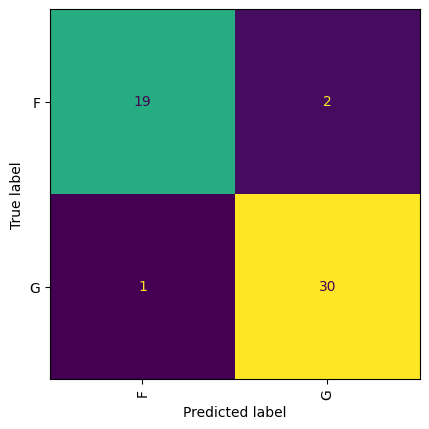

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe_bb, X_test, y_test, display_labels=['F', 'G'], values_format = 'd', xticks_rotation="vertical", colorbar=False)